In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 유튜브 링크
# https://youtu.be/eXONdJCuBHE

In [2]:
ballon = pd.read_csv('ballon-d-or.csv', sep=",", header = 0)

In [3]:
ballon.head()

,number,year,rank,player,team,points,percentages
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45


In [4]:
ballon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       197 non-null    int64  
 1   year         197 non-null    int64  
 2   rank         197 non-null    object 
 3   player       197 non-null    object 
 4   team         197 non-null    object 
 5   points       179 non-null    float64
 6   percentages  191 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.9+ KB


In [5]:
# 데이터에서 누락되어 있는게 있는지 확인
ballon.describe()

,number,year,points,percentages
count,197.000000,197.000000,179.000000,191.000000
mean,98.000000,1987.873096,134.910615,32.112775
std,57.013156,18.871454,156.608662,12.650955
min,0.000000,1956.000000,16.000000,7.860000
25%,49.000000,1972.000000,51.000000,22.940000
50%,98.000000,1988.000000,80.000000,29.890000
75%,147.000000,2004.000000,140.500000,41.000000
max,196.000000,2021.000000,946.000000,68.320000


In [6]:
# 데이터에서 null값이 있는지 확인
ballon.isnull().any()

number         False
year           False
rank           False
player         False
team           False
points          True
percentages     True
dtype: bool

In [7]:
# points컬럼 값이 NULL일 경우 평균값으로 대체
ballon['points'].fillna(value = ballon['points'].mean(), inplace = True)

In [8]:
ballon.columns

Index(['number', 'year', 'rank', 'player', 'team', 'points', 'percentages'], dtype='object')

In [9]:
chosen_columns = [
    'year',
    'rank',
    'player',
    'team',
    'points',
    'percentages'
]

In [10]:
df = pd.DataFrame(ballon, columns = chosen_columns)

In [11]:
df.sample(5)

,year,rank,player,team,points,percentages
171,2012,2nd,Cristiano Ronaldo,Real Madrid,134.910615,23.68
73,1980,1st,Karl-Heinz Rummenigge,Bayern Munich,122.000000,64.55
164,2010,1st,Lionel Messi,Barcelona,134.910615,22.65
105,1990,3rd,Andreas Brehme,Internazionale,68.000000,23.53
176,2014,1st,Cristiano Ronaldo,Real Madrid,134.910615,37.66


In [12]:
# 각 리그 별 팀
premier_league = ['Arsenal', 'Blackpool', 'Chelsea', 'Fulham', 'Liverpool', 'Manchester United', 'Newcastle United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']

primera_division = ['Atlético Madrid', 'Barcelona', 'Real Madrid']

serie_a = ['Cagliari', 'Hellas Verona', 'Internazionale', 'Juventus', 'Milan']

ligue_1 = ['Bordeaux', 'Marseille', 'Nancy', 'Paris Saint-Germain', 'Saint-Étienne', 'Stade de Reims']

bundesliga = ['Bayern Munich', 'Borussia Dortmund', 'Borussia Mönchengladbach', 'Hamburg', 'Köln', 'Rot-Weiss Essen']

In [13]:
# 각 팀들을 리그별로 분리
def club_to_league(df_value):
    try:
        element = df_value

        if element in premier_league:
            value = 'Premier League'
        elif element in primera_division:
            value = 'Primera Division'
        elif element in serie_a:
            value = 'Serie A'
        elif element in ligue_1:
            value = 'Ligue 1'
        elif element in bundesliga:
            value = 'Bundesliga'
        else: 
            value = 'Others'
    except ValueError:
        value = 0
    return value


In [14]:
# 선수가 발롱도르를 몇번 탔는지 세어주는 함수
def winning_index(df_value):
    try:
        element = df_value

        if element == '1st':
            value = 1
        else: 
            value = 0
    except ValueError:
        value = 0
    return value

In [15]:
df['League'] = df['team'].apply(club_to_league)

In [16]:
df['Winning_index'] = df['rank'].apply(winning_index)

In [17]:
df.head()

,year,rank,player,team,points,percentages,League,Winning_index
0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90,Premier League,1
1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48,Primera Division,0
2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61,Primera Division,0
3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54,Primera Division,1
4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45,Premier League,0


In [18]:
# 각 팀별로 역대 최고 포인트를 받은 선수들
df.iloc[df.groupby(df['team'])['points'].idxmax()][['team', 'player', 'points']]

,team,player,points
46,Ajax,Johan Cruyff,116.0
62,Anderlecht,Rob Rensenbrink,75.0
144,Arsenal,Thierry Henry,128.0
190,Atletico Madrid,Antoine Griezmann,414.0
95,Atlético Madrid,Paulo Futre,91.0
191,Barcelona,Lionel Messi,686.0
195,Bayern Munich,Robert Lewandowski,580.0
32,Benfica,Eusébio,80.0
0,Blackpool,Stanley Matthews,47.0
80,Bordeaux,Alain Giresse,64.0


In [19]:
# 최근 10년간 발롱도르를 받은 선수들(2020년은 코로나로 인해 발롱도르가 취소됨)
df[(df['year'] > 2011) & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
170,2012,1st,Lionel Messi,Barcelona,134.910615,41.60,Primera Division,1
173,2013,1st,Cristiano Ronaldo,Real Madrid,134.910615,27.99,Primera Division,1
176,2014,1st,Cristiano Ronaldo,Real Madrid,134.910615,37.66,Primera Division,1
179,2015,1st,Lionel Messi,Barcelona,134.910615,41.33,Primera Division,1
182,2016,1st,Cristiano Ronaldo,Real Madrid,745.000000,59.17,Primera Division,1
185,2017,1st,Cristiano Ronaldo,Real Madrid,946.000000,47.85,Primera Division,1
188,2018,1st,Luka Modrić,Real Madrid,753.000000,45.83,Primera Division,1
191,2019,1st,Lionel Messi,Barcelona,686.000000,NaN,Primera Division,1
194,2021,1st,Lionel Messi,Barcelona,613.000000,NaN,Primera Division,1


In [20]:
# 역대 최고 5대 팀 별로 수상 이력
# 첫번째로 바르샤
df[(df['team'] == "Barcelona") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
13,1960,1st,Luis Suárez,Barcelona,54.000000,43.55,Primera Division,1
52,1973,1st,Johan Cruyff,Barcelona,96.000000,51.34,Primera Division,1
55,1974,1st,Johan Cruyff,Barcelona,116.000000,45.31,Primera Division,1
116,1994,1st,Hristo Stoichkov,Barcelona,210.000000,46.15,Primera Division,1
131,1999,1st,Rivaldo,Barcelona,219.000000,50.11,Primera Division,1
149,2005,1st,Ronaldinho,Barcelona,225.000000,43.69,Primera Division,1
161,2009,1st,Lionel Messi,Barcelona,473.000000,54.00,Primera Division,1
164,2010,1st,Lionel Messi,Barcelona,134.910615,22.65,Primera Division,1
167,2011,1st,Lionel Messi,Barcelona,134.910615,47.88,Primera Division,1
170,2012,1st,Lionel Messi,Barcelona,134.910615,41.60,Primera Division,1


In [21]:
# 두번째로 레알마드리드
df[(df['team'] == "Real Madrid") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.000000,58.54,Primera Division,1
7,1958,1st,Raymond Kopa,Real Madrid,71.000000,52.99,Primera Division,1
10,1959,1st,Alfredo Di Stéfano,Real Madrid,80.000000,54.79,Primera Division,1
134,2000,1st,Luís Figo,Real Madrid,197.000000,42.55,Primera Division,1
140,2002,1st,Ronaldo,Real Madrid,169.000000,39.86,Primera Division,1
152,2006,1st,Fabio Cannavaro,Real Madrid,173.000000,41.39,Primera Division,1
173,2013,1st,Cristiano Ronaldo,Real Madrid,134.910615,27.99,Primera Division,1
176,2014,1st,Cristiano Ronaldo,Real Madrid,134.910615,37.66,Primera Division,1
182,2016,1st,Cristiano Ronaldo,Real Madrid,745.000000,59.17,Primera Division,1
185,2017,1st,Cristiano Ronaldo,Real Madrid,946.000000,47.85,Primera Division,1


In [22]:
# 3번째로 유벤투스
df[(df['team'] == "Juventus") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
16,1961,1st,Omar Sívori,Juventus,46.0,42.59,Serie A,1
79,1982,1st,Paolo Rossi,Juventus,115.0,52.75,Serie A,1
82,1983,1st,Michel Platini,Juventus,110.0,68.32,Serie A,1
85,1984,1st,Michel Platini,Juventus,110.0,51.16,Serie A,1
88,1985,1st,Michel Platini,Juventus,127.0,52.05,Serie A,1
113,1993,1st,Roberto Baggio,Juventus,142.0,54.83,Serie A,1
128,1998,1st,Zinedine Zidane,Juventus,244.0,64.55,Serie A,1
143,2003,1st,Pavel Nedvěd,Juventus,190.0,43.08,Serie A,1


In [23]:
# 4번째로 바이에르 뮌헨
df[(df['team'] == "Bayern Munich") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
43,1970,1st,Gerd Müller,Bayern Munich,77.0,36.32,Bundesliga,1
49,1972,1st,Franz Beckenbauer,Bayern Munich,81.0,33.89,Bundesliga,1
61,1976,1st,Franz Beckenbauer,Bayern Munich,91.0,41.74,Bundesliga,1
73,1980,1st,Karl-Heinz Rummenigge,Bayern Munich,122.0,64.55,Bundesliga,1
76,1981,1st,Karl-Heinz Rummenigge,Bayern Munich,106.0,50.72,Bundesliga,1


In [24]:
# 5번째로 AC밀란
df[(df['team'] == "Milan") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,Winning_index
40,1969,1st,Gianni Rivera,Milan,83.0,41.50,Serie A,1
94,1987,1st,Ruud Gullit,Milan,106.0,41.09,Serie A,1
97,1988,1st,Marco van Basten,Milan,129.0,49.24,Serie A,1
100,1989,1st,Marco van Basten,Milan,129.0,51.19,Serie A,1
110,1992,1st,Marco van Basten,Milan,98.0,42.42,Serie A,1
119,1995,1st,George Weah,Milan,144.0,45.14,Serie A,1
146,2004,1st,Andriy Shevchenko,Milan,175.0,39.15,Serie A,1
155,2007,1st,Kaka,Milan,444.0,45.49,Serie A,1


Text(0.5, 1.0, 'Top 5 teams with highest points score')

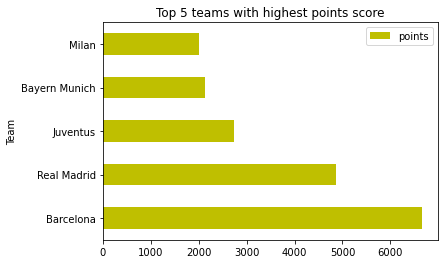

In [25]:
# 역대 포인트 합이 TOP 5인 클럽
df_tp = df.groupby(['team'])['points'].sum().sort_values(ascending = False).head(5)
df_tp = pd.DataFrame(data = df_tp, columns = ['points'])
index_list = list(df_tp.index)
df_tp.insert(1, column = 'Team', value = index_list)
df_tp.plot(kind = 'barh', x='Team', color = 'y')
plt.title('Top 5 teams with highest points score')

Text(0.5, 1.0, 'Most rewarded Leagues')

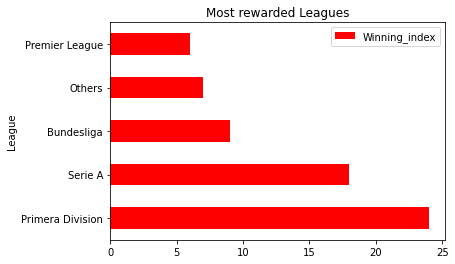

In [26]:
# 역대 리그 수상자 순위
df_leagues = df.groupby(['League'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_leagues = pd.DataFrame(data = df_leagues, columns = ['Winning_index'])
index_list = list(df_leagues.index)
df_leagues.insert(1, column = 'League', value = index_list)
df_leagues.plot(kind = 'barh', x='League', y = 'Winning_index', color = 'r')
plt.title('Most rewarded Leagues')

Text(0.5, 1.0, 'Top 5 teams with highest amout of rewards')

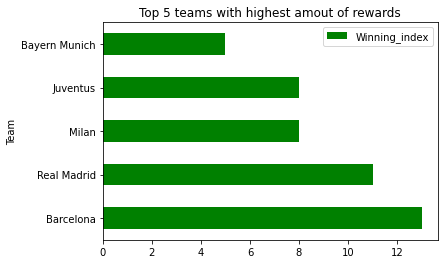

In [27]:
# 역대 발롱도르 수상자를 가장 많이 배출한 클럽
df_winning_team = df.groupby(['team'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_winning_team = pd.DataFrame(data = df_winning_team, columns = ['Winning_index'])
index_list = list(df_winning_team.index)
df_winning_team.insert(1, column = 'Team', value = index_list)

df_winning_team.plot(kind = 'barh', x='Team', y = 'Winning_index', color = 'g')
plt.title('Top 5 teams with highest amout of rewards')

Text(0.5, 1.0, 'Top 5 players with highest amount of rewards')

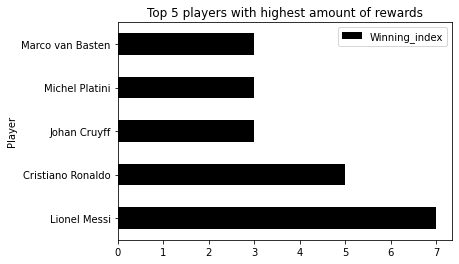

In [28]:
# 역대 발롱도르 수상자 중 TOP 5
df_winner = df.groupby(['player'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_winner = pd.DataFrame(data = df_winner, columns = ['Winning_index'])
index_list = list(df_winner.index)
df_winner.insert(1, column = 'Player', value = index_list)

df_winner.plot(kind = 'barh', x='Player', y = 'Winning_index', color = 'k')
plt.title('Top 5 players with highest amount of rewards')

In [29]:
# rank 값들을 int형으로 변환
def StrToInt(rank):
    if rank == '1st':
        rank = 1
    elif rank == '2nd':
        rank = 2
    elif rank == '3rd':
        rank = 3
    return rank

In [30]:
# rank값이 2인지 아닌지 구분
def selectSecRank(rank):
    if rank == 2:
        rank = 1
    else:
        rank = 0
    return rank

In [31]:
df['rank'] = df['rank'].apply(StrToInt)

In [32]:
df['secondrank'] = df['rank'].apply(selectSecRank)

Text(0.5, 1.0, 'Top5 players with the most 2nd place')

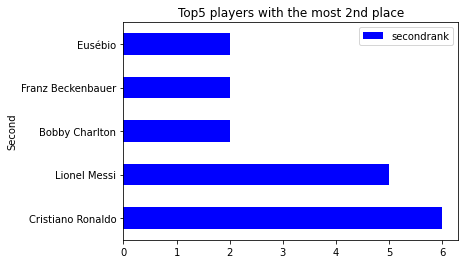

In [33]:
# 발롱도르 2위를 한 TOP 5  선수
df_tp = df.groupby(['player'])['secondrank'].sum().sort_values(ascending = False).head(5)
df_tp = pd.DataFrame(data = df_tp, columns = ['secondrank'])
index_list = list(df_tp.index)
df_tp.insert(1, column = 'Second', value = index_list)
df_tp.plot(kind = 'barh', x='Second', color = 'b')
plt.title('Top5 players with the most 2nd place')

In [34]:
# rank값이 3인지 아닌지 구분
def selectThirdRank(rank):
    if rank == 3:
        rank = 1
    else:
        rank = 0
    return rank

In [35]:
df['rank'] = df['rank'].apply(StrToInt)

In [36]:
df['thirdrank'] = df['rank'].apply(selectThirdRank)

Text(0.5, 1.0, 'Top5 players with the most 3rd place')

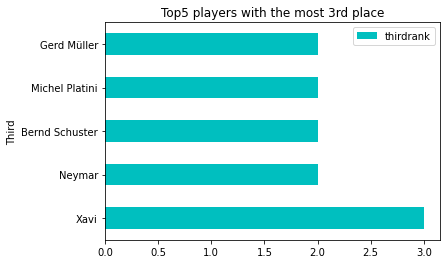

In [37]:
# 발롱도르 3위를 한 TOP 5 선수
df_tp = df.groupby(['player'])['thirdrank'].sum().sort_values(ascending = False).head(5)
df_tp = pd.DataFrame(data = df_tp, columns = ['thirdrank'])
index_list = list(df_tp.index)
df_tp.insert(1, column = 'Third', value = index_list)
df_tp.plot(kind = 'barh', x='Third', color = 'c')
plt.title('Top5 players with the most 3rd place')

In [38]:
# 유튜브 링크
# https://youtu.be/eXONdJCuBHE